In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_excel("CW_Data.xlsx")

# 移除索引列
data = data.drop('Index', axis=1)

data.shape

(619, 10)

In [2]:
X = data.drop(['Programme'], axis=1)
y = data['Programme']
color_indices = data["Programme"]
print(X.shape)
print(y.shape)
np.random.seed(42)

(619, 9)
(619,)


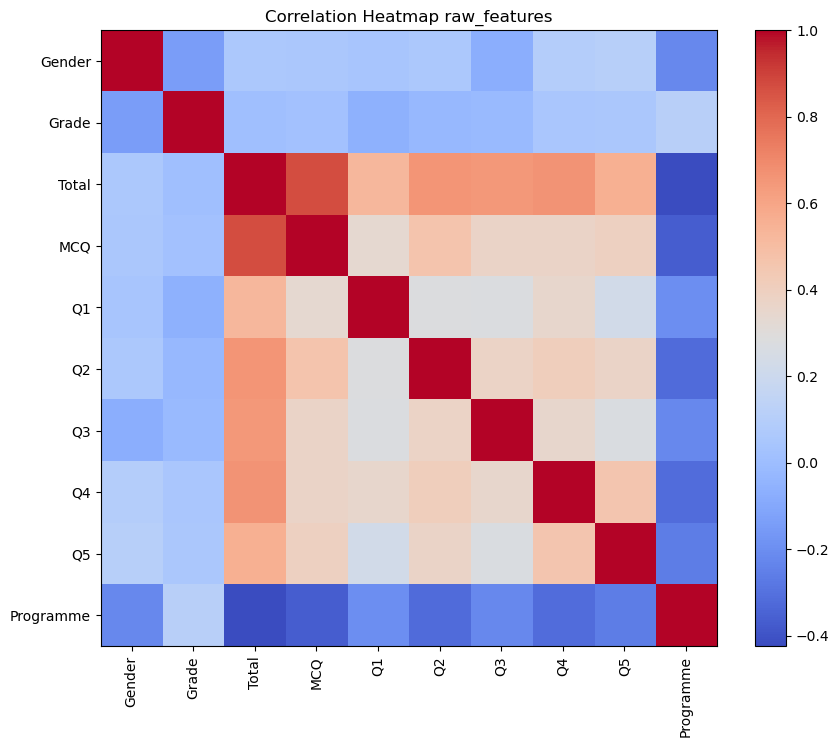

In [3]:
"""raw features"""
data_raw_features = pd.concat([X, y], axis=1)

# 计算特征矩阵 X 和目标变量 y 之间的相关系数
correlation_matrix_raw_features = data_raw_features.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix_raw_features, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap raw_features')
plt.xticks(range(len(correlation_matrix_raw_features.columns)), correlation_matrix_raw_features.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_raw_features.columns)), correlation_matrix_raw_features.columns)
plt.show()

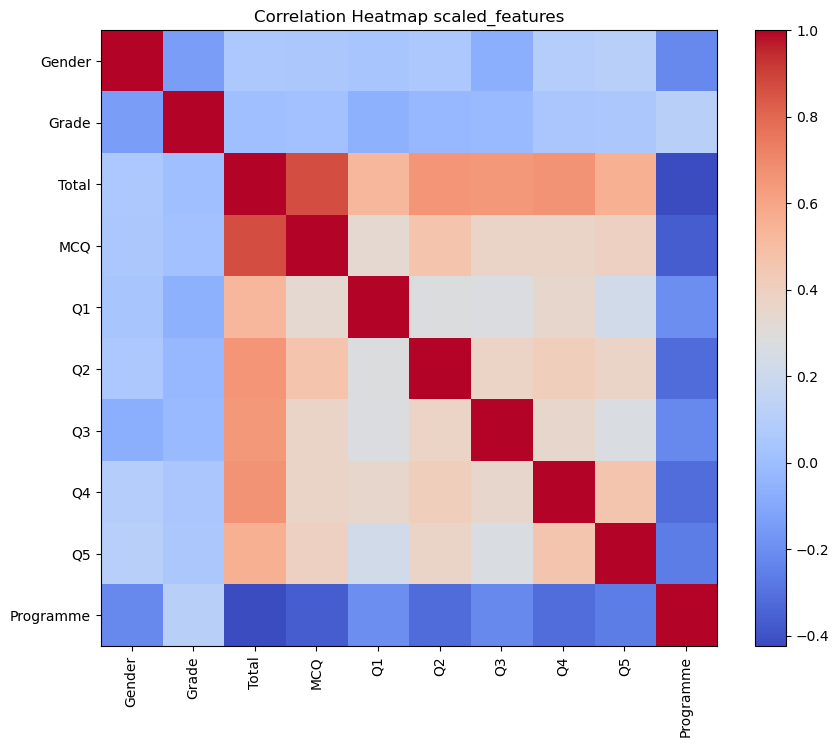

In [4]:
"""scaled features"""
avg = X.mean(axis=0)
std = X.std(axis=0)
X_centered = (X - avg) / (std + 1e-16)

data_scaled_features = pd.concat([X_centered, y], axis=1)

# 计算特征矩阵 X 和目标变量 y 之间的相关系数
correlation_matrix_scaled_features = data_scaled_features.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix_scaled_features, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap scaled_features')
plt.xticks(range(len(correlation_matrix_scaled_features.columns)), correlation_matrix_scaled_features.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_scaled_features.columns)), correlation_matrix_scaled_features.columns)
plt.show()

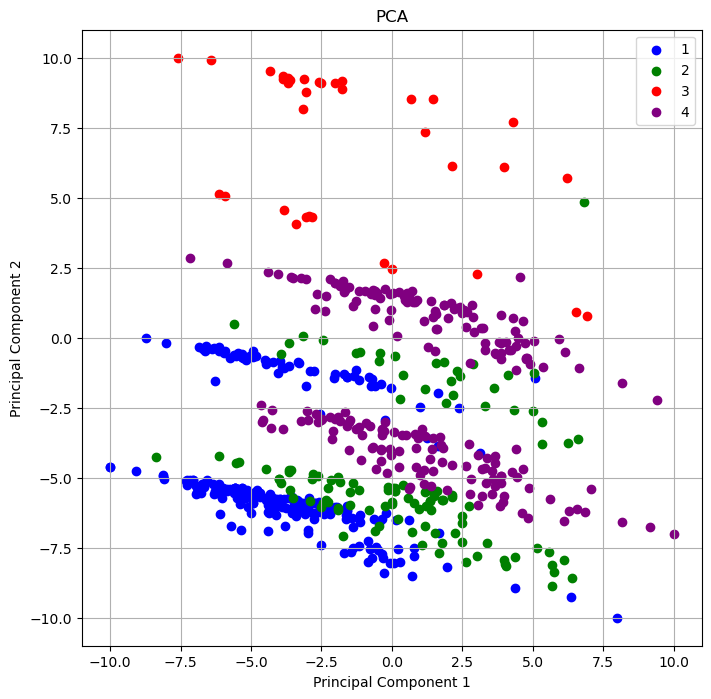

In [5]:
"""PCA"""
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pca = PCA(n_components=2)
X_PCA = StandardScaler().fit_transform(data.values)
principalComponents = pca.fit_transform(X_PCA)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# 缩放主成分范围到 [-10, 10]
new_min = -10
new_max = 10
scaler = MinMaxScaler(feature_range=(new_min, new_max))
principalDf[['PC1', 'PC2']] = scaler.fit_transform(principalDf[['PC1', 'PC2']])

colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(8, 8))
for category, color in zip(range(1, 5), colors):
    indicesToKeep = color_indices == category
    plt.scatter(principalDf.loc[indicesToKeep, 'PC1'], principalDf.loc[indicesToKeep, 'PC2'], c=color, label=category)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.grid(True)
plt.legend()
plt.show()

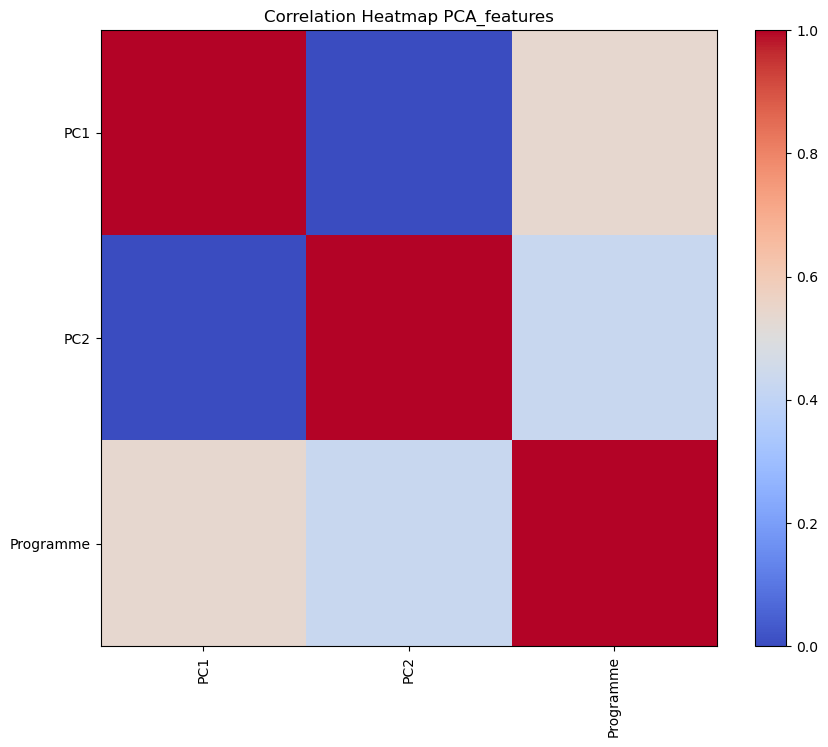

In [6]:
"""PCA"""
data_PCA = pd.concat([principalDf, y], axis=1)

# 计算特征矩阵 X 和目标变量 y 之间的相关系数
correlation_matrix_PCA = data_PCA.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix_PCA, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap PCA_features')
plt.xticks(range(len(correlation_matrix_PCA.columns)), correlation_matrix_PCA.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_PCA.columns)), correlation_matrix_PCA.columns)
plt.show()

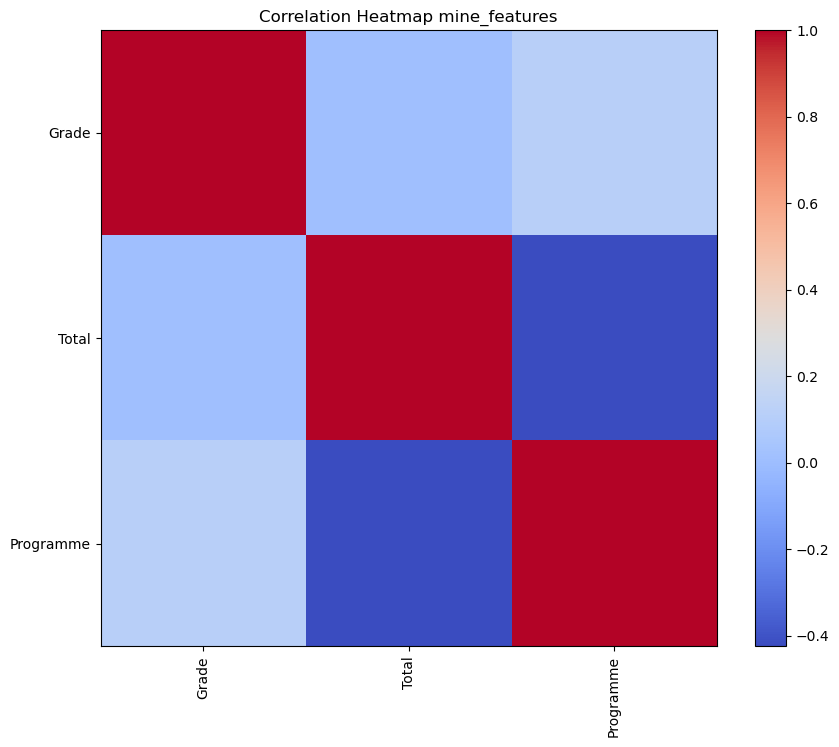

In [7]:
"""mine"""
X_mine = data[['Grade', 'Total']]

data_mine = pd.concat([X_mine, y], axis=1)

# 计算特征矩阵 X 和目标变量 y 之间的相关系数
correlation_matrix_mine = data_mine.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix_mine, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap mine_features')
plt.xticks(range(len(correlation_matrix_mine.columns)), correlation_matrix_mine.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_mine.columns)), correlation_matrix_mine.columns)
plt.show()